In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

borough_map = {
    1: 'Manhattan',
    2: 'Bronx',
    3: 'Brooklyn',
    4: 'Queens',
    5: 'Staten Island'
}

# columns
# BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
dir_path = r".\mortgage_data_csv"

def load_data(directory: str):
    all_data = pd.DataFrame()
    for filename in os.listdir(directory):
        if filename.endswith('.csv'):
            file_path = os.path.join(directory, filename)
            df = pd.read_csv(file_path)
            all_data = pd.concat([all_data, df], ignore_index=True)
    all_data['SALE DATE'] = pd.to_datetime(all_data['SALE DATE'])
    all_data['SALE PRICE'] = pd.to_numeric(all_data['SALE PRICE'], errors='coerce')
    all_data['BOROUGH'] = all_data['BOROUGH'].map(borough_map)
    all_data['NEIGHBORHOOD'] = all_data['NEIGHBORHOOD'].str.strip().str.title()
    all_data = all_data[all_data['SALE PRICE'] > 0]
    return all_data

df = load_data(dir_path)

In [2]:
#foresthills["BUILDING CLASS CATEGORY"].unique()
foresthills = df[(df["NEIGHBORHOOD"].str.lower() == "forest hills") & (df["BUILDING CLASS CATEGORY"].str.lower().str.contains("coop"))]

C:\Users\bhatt\AppData\Local\Temp\ipykernel_25536\3822491930.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fhavg['YEAR'] = fhavg['SALE DATE'].dt.year


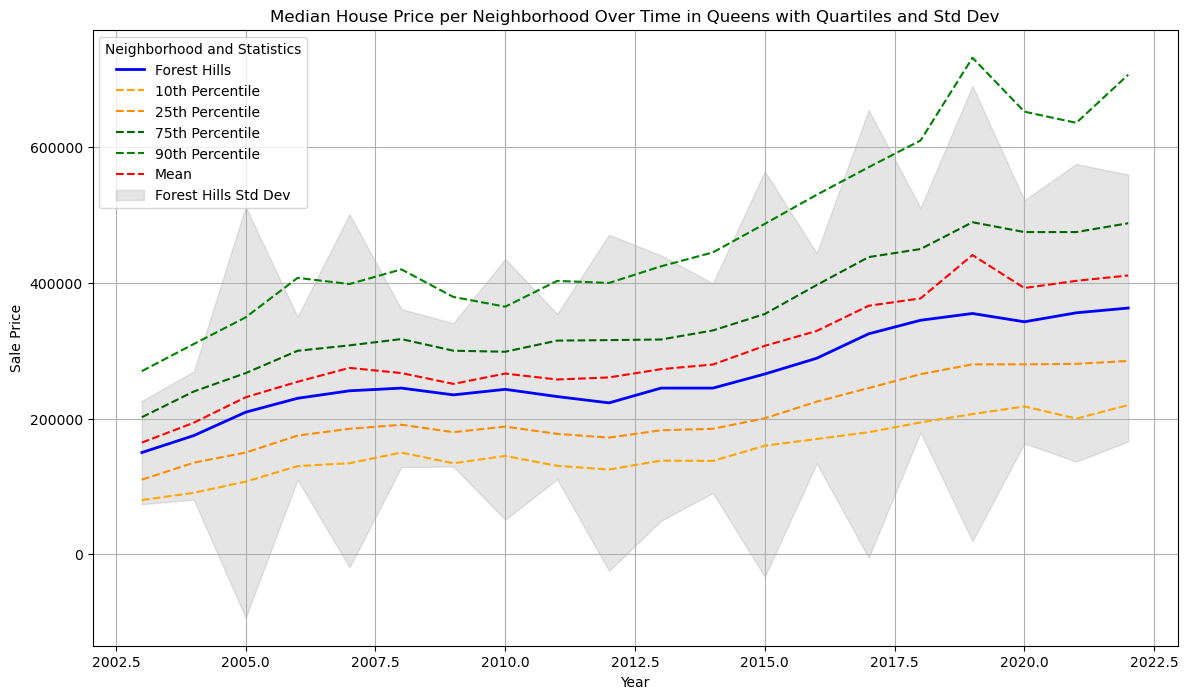

<Figure size 1400x800 with 0 Axes>

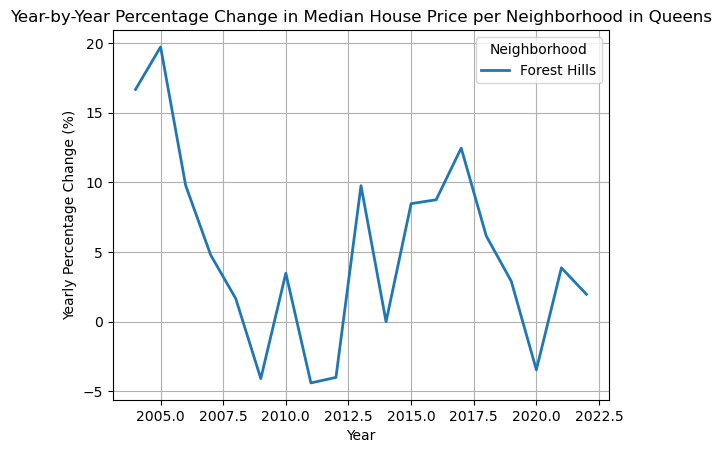

In [3]:
# Create the YEAR column
fhavg = foresthills
fhavg['YEAR'] = fhavg['SALE DATE'].dt.year

# Calculate median, quartiles, and standard deviation
median_prices = fhavg.groupby(['NEIGHBORHOOD', 'YEAR'])['SALE PRICE'].median().unstack(0)
mean_prices = fhavg.groupby(['NEIGHBORHOOD', 'YEAR'])['SALE PRICE'].mean().unstack(0)
a1_prices = fhavg.groupby(['NEIGHBORHOOD', 'YEAR'])['SALE PRICE'].quantile(0.1).unstack(0)
q1_prices = fhavg.groupby(['NEIGHBORHOOD', 'YEAR'])['SALE PRICE'].quantile(0.25).unstack(0)
q3_prices = fhavg.groupby(['NEIGHBORHOOD', 'YEAR'])['SALE PRICE'].quantile(0.75).unstack(0)
a3_prices = fhavg.groupby(['NEIGHBORHOOD', 'YEAR'])['SALE PRICE'].quantile(0.90).unstack(0)
std_prices = fhavg.groupby(['NEIGHBORHOOD', 'YEAR'])['SALE PRICE'].std().unstack(0)

# Plot the data
plt.figure(figsize=(14, 8))

# Plotting the median prices
median_prices.plot(kind='line', linestyle='-', linewidth=2, ax=plt.gca(), color='blue')

# Plotting the 25th and 75th percentiles
plt.plot(a1_prices.index, a1_prices, linestyle='--', linewidth=1.5, color='orange', label='10th Percentile')
plt.plot(q1_prices.index, q1_prices, linestyle='--', linewidth=1.5, color='darkorange', label='25th Percentile')
plt.plot(q3_prices.index, q3_prices, linestyle='--', linewidth=1.5, color='darkgreen', label='75th Percentile')
plt.plot(a3_prices.index, a3_prices, linestyle='--', linewidth=1.5, color='green', label='90th Percentile')
plt.plot(mean_prices.index, mean_prices, linestyle='--', linewidth=1.5, color='red', label='Mean')

# Plotting the standard deviation as shaded areas
for neighborhood in median_prices.columns:
    plt.fill_between(
        median_prices.index,
        median_prices[neighborhood] - std_prices[neighborhood],
        median_prices[neighborhood] + std_prices[neighborhood],
        alpha=0.2, label=f'{neighborhood} Std Dev', color='gray'
    )

# Adding titles and labels
plt.title('Median House Price per Neighborhood Over Time in Queens with Quartiles and Std Dev')
plt.xlabel('Year')
plt.ylabel('Sale Price')
plt.legend(title='Neighborhood and Statistics')
plt.grid(True)
plt.show()

# Plotting relative year-by-year change
plt.figure(figsize=(14, 8))
relative_change = median_prices.pct_change() * 100  # Convert to percentage
relative_change.plot(kind='line', linestyle='-', linewidth=2)

# Adding titles and labels
plt.title('Year-by-Year Percentage Change in Median House Price per Neighborhood in Queens')
plt.xlabel('Year')
plt.ylabel('Yearly Percentage Change (%)')
plt.legend(title='Neighborhood')
plt.grid(True)
plt.show()
